<a href="https://colab.research.google.com/github/MedulHasan/Deep-Learning/blob/master/Stock_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader as web
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
'''import io
from google.colab import files
uploaded = files.upload()'''

'import io\nfrom google.colab import files\nuploaded = files.upload()'

In [ ]:
#df = web.DataReader('TM', data_source='yahoo', start='2012-01-01', end='2019-12-17')
csv_file = 'MSFT.csv'
df = pd.read_csv(csv_file)
df

In [ ]:
#number of rows and columns
df.shape

(251, 7)

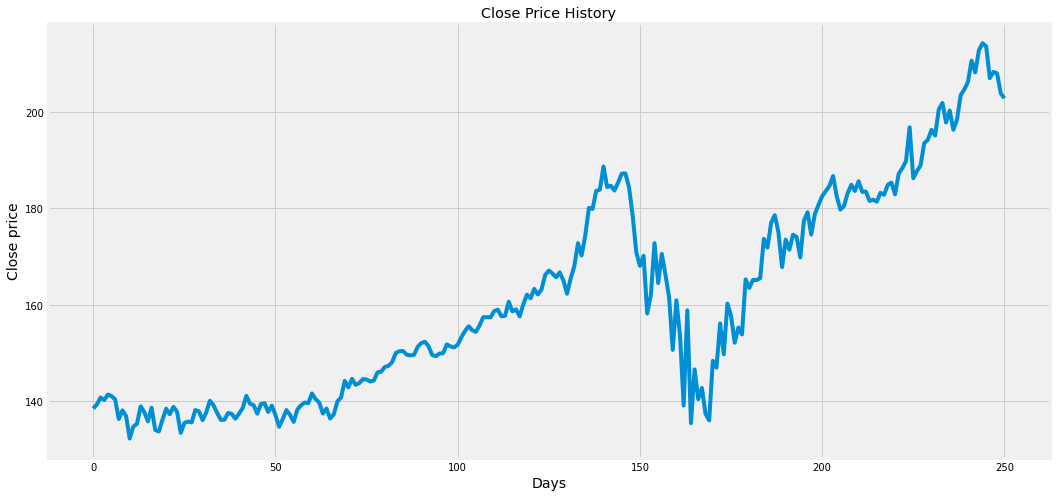

In [ ]:
#visulize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Days', fontsize=14)
plt.ylabel(('Close price'), fontsize=14)
plt.show()

In [ ]:
#create a new dataframe with close_price
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#dataset

#get the number of row to train the model
train_data_len = math.ceil(len(dataset) * 0.8)
train_data_len

201

In [ ]:
#scale tha data
'''calculate min_max_scaler formula =  "(x_i - x_min) / (x_max - x_min)"     '''
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data

In [ ]:
#training data set
#creat the scaled training data set
train_data = scaled_data[0:train_data_len, :]
#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<=31:
    print(x_train)
    print(y_train)
    print()

[array([0.07575187, 0.08622562, 0.10364138, 0.09718664, 0.11119217,
       0.10741678, 0.09913529, 0.04944583, 0.07124578, 0.05711834,
       0.        , 0.03020332, 0.03738877, 0.08135418, 0.06698332,
       0.04359988, 0.07782242, 0.02155631, 0.01790264, 0.04774081,
       0.07550843, 0.06150272, 0.08013623, 0.06783573, 0.01437087,
       0.03945914, 0.04299109, 0.04079882, 0.07197647, 0.06881006])]
[0.046644574351479395]

[array([0.07575187, 0.08622562, 0.10364138, 0.09718664, 0.11119217,
       0.10741678, 0.09913529, 0.04944583, 0.07124578, 0.05711834,
       0.        , 0.03020332, 0.03738877, 0.08135418, 0.06698332,
       0.04359988, 0.07782242, 0.02155631, 0.01790264, 0.04774081,
       0.07550843, 0.06150272, 0.08013623, 0.06783573, 0.01437087,
       0.03945914, 0.04299109, 0.04079882, 0.07197647, 0.06881006]), array([0.08622562, 0.10364138, 0.09718664, 0.11119217, 0.10741678,
       0.09913529, 0.04944583, 0.07124578, 0.05711834, 0.        ,
       0.03020332, 0.03738877, 0

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(171, 30, 1)

In [ ]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)#

171/171 [==============================] - 2s 13ms/step - loss: 0.0190


In [ ]:
#create the testing data
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[train_data_len - 30:, :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

16.08159485283203

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


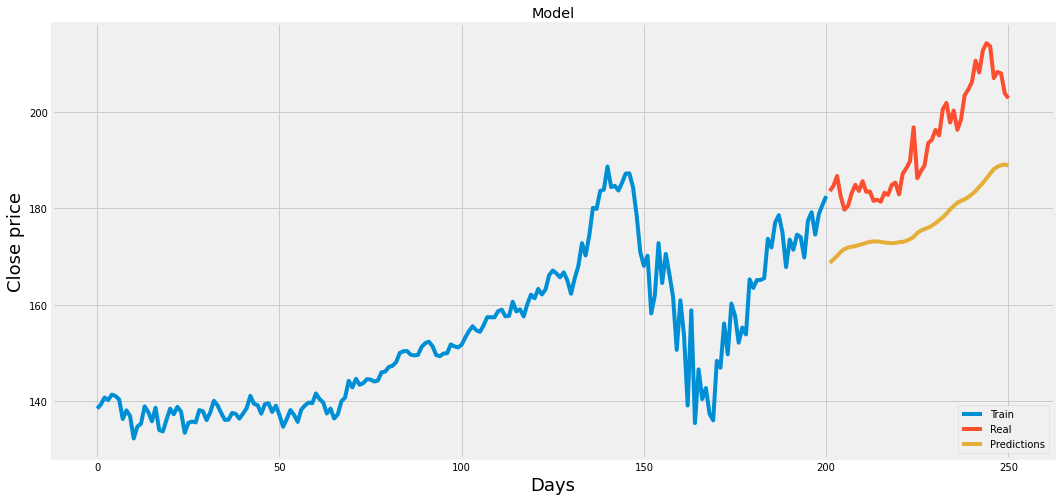

In [ ]:
#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions']  = predictions
#visualized the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Real', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#show the valid and predicted price
valid

,Close,Predictions
201,183.600006,168.701523
202,184.679993,169.398056
203,186.740005,170.144730
204,182.509995,170.960159
205,179.750000,171.564880
206,180.529999,171.877090
207,183.160004,172.027298
208,184.910004,172.187805
209,183.630005,172.416931
210,185.660004,172.613464
